##Stock Market Analysis

Importing the Stocks Dataset from Wikipedia.

In [ ]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Reading all tables from the provided URL
tables = pd.read_html(url)

# Selecting the first table assuming the S&P 500 list is the first table
sp_500_table = tables[0]
print(sp_500_table.head(5))

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [ ]:
# Convert the DataFrame to a CSV file
sp_500_table.to_csv("sp_500_companies.csv", index=False)

# Read the CSV file back into a new DataFrame
sp_500_list = pd.read_csv("sp_500_companies.csv")
print(sp_500_list.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [ ]:
import pandas as pd

def calculate_daily_returns(df, ticker, horizon):

  # Iterate through the desired horizon
  for i in range(1, horizon + 1):
    # Calculate daily return: (future_price - current_price) / current_price
    df[f'{ticker}_{i}d'] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
  return df.fillna(0)

def get_sp500_data():

  # Read data from CSV and handle potential missing values
  return pd.read_csv("sp_500_companies.csv", index_col=0).fillna(0)

if __name__ == "__main__":
  # Define parameters
  horizon = 7  # Number of days for return calculation
  ticker = 'CIK'

  # Get S&P 500 data
  sp500_df = get_sp500_data()

  # Get all tickers from the DataFrame
  all_tickers = sp500_df.columns.tolist()

  # Calculate daily returns for the specified ticker
  df_with_returns = calculate_daily_returns(sp500_df, ticker, horizon)

  print(f"Tickers: {all_tickers}")
  print(df_with_returns)

Tickers: ['Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'CIK', 'Founded']
                   Security             GICS Sector  \
Symbol                                                
MMM                      3M             Industrials   
AOS             A. O. Smith             Industrials   
ABT     Abbott Laboratories             Health Care   
ABBV                 AbbVie             Health Care   
ACN               Accenture  Information Technology   
...                     ...                     ...   
XYL              Xylem Inc.             Industrials   
YUM             Yum! Brands  Consumer Discretionary   
ZBRA     Zebra Technologies  Information Technology   
ZBH           Zimmer Biomet             Health Care   
ZTS                  Zoetis             Health Care   

                                   GICS Sub-Industry    Headquarters Location  \
Symbol                                                                          
MMM    

In [ ]:
# Import yfinance library to access financial data
import yfinance as yf

# Extract all symbols (tickers) from the "Symbol" column
symbols = sp_500_table["Symbol"].tolist()

# Download historical data for Tesla (TSLA) for the past month
tesla_list = yf.Ticker("TSLA").history(period="1mo")  # Adjust the period as needed

# Extract company information from the downloaded data
tesla_info = tesla_list.info

# Print the company information
print(tesla_info)

<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
2024-11-21 00:00:00-05:00  343.809998  347.989990  335.279999  339.640015   
2024-11-22 00:00:00-05:00  341.089996  361.529999  337.700012  352.559998   
2024-11-25 00:00:00-05:00  360.140015  361.929993  338.200012  338.589996   
2024-11-26 00:00:00-05:00  341.000000  346.959991  335.660004  338.230011   
2024-11-27 00:00:00-05:00  341.799988  342.549988  326.589996  332.890015   
2024-11-29 00:00:00-05:00  336.079987  345.450012  334.649994  345.160004   
2024-12-02 00:00:00-05:00  352.380005  360.000000  351.149994  357.089996   
2024-12-03 00:00:00-05:00  351.799988  355.690002  348.200012  351.420013   
2024-12-04 00:00:00-05:00  353.000000  358.100006  348.600006  357.929993   
2024-12-05 00:00:00-05:00  359.869995  375.429993  359.500000  369.489990   
2024-12-06 00:00:00-05:00  377.420013  389.4

In [ ]:
!pip install schedule  # Importing the schedule to run the code
import schedule
import time

In [ ]:
# This function updates the S&P 500 company list
def update_stock_list():

# URL containing the Wikipedia table with S&P 500 companies
  url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
  tables = pd.read_html(url)
  sp_500_table = tables[0]
  sp_500_table.to_csv("sp_500_companies.csv", index=False)

# Schedule the update_stock_list function to run daily at 7:29 PM
schedule.every().day.at("19:29").do(update_stock_list)

# Run the scheduler to execute tasks
# while True:
#     schedule.run_pending()
#     time.sleep(5)

Every 1 day at 19:29:00 do update_stock_list() (last run: [never], next run: 2024-12-22 19:29:00)

Importing real-time stock data from Yahoo Finance.

In [ ]:
import pandas as pd
import yfinance as yf

ticker = 'TSLA'
data = yf.Ticker(ticker).history(period='5y')
print(data.head(5))

# Define a list of S&P 500 stock ticker symbols
sp500_symbols = ["TSLA", "META", "AAPL", "AMZN", "NFLX", "GOOGL"]

# Create a dictionary to store historical data for each S&P 500 stock
sp500_data = {symbol: yf.Ticker(symbol).history(period='5y') for symbol in sp500_symbols}

                                Open       High        Low      Close  \
Date                                                                    
2019-12-23 00:00:00-05:00  27.452000  28.134001  27.333332  27.948000   
2019-12-24 00:00:00-05:00  27.890667  28.364668  27.512667  28.350000   
2019-12-26 00:00:00-05:00  28.527332  28.898666  28.423332  28.729334   
2019-12-27 00:00:00-05:00  29.000000  29.020666  28.407333  28.691999   
2019-12-30 00:00:00-05:00  28.586000  28.600000  27.284000  27.646667   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-12-23 00:00:00-05:00  199794000        0.0           0.0  
2019-12-24 00:00:00-05:00  120820500        0.0           0.0  
2019-12-26 00:00:00-05:00  159508500        0.0           0.0  
2019-12-27 00:00:00-05:00  149185500        0.0           0.0  
2019-12-30 00:00:00-05:00  188796000        0.0           0.0  


Plotting the closing price in $$$

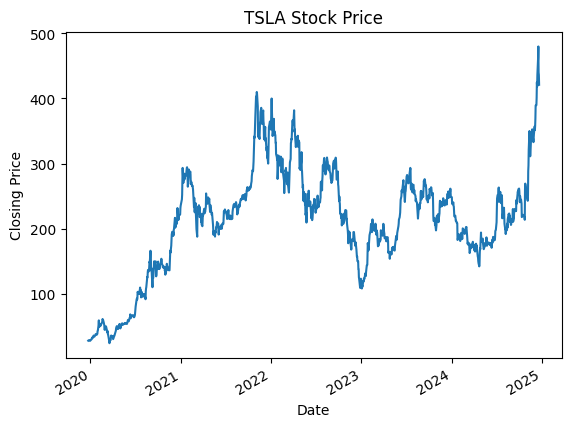

In [ ]:
import matplotlib.pyplot as plt

data['Close'].plot()
plt.title(f"{ticker} Stock Price")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Plotting the trading volume in 100 Million

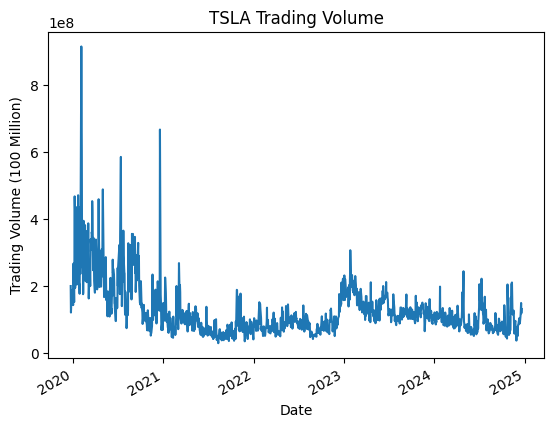

In [ ]:
data['Volume'].plot()
plt.title(f"{ticker} Trading Volume")
plt.xlabel('Date')
plt.ylabel('Trading Volume (100 Million)')
plt.show()

Comparing Moving averages for 15 day and 50 day with closing price

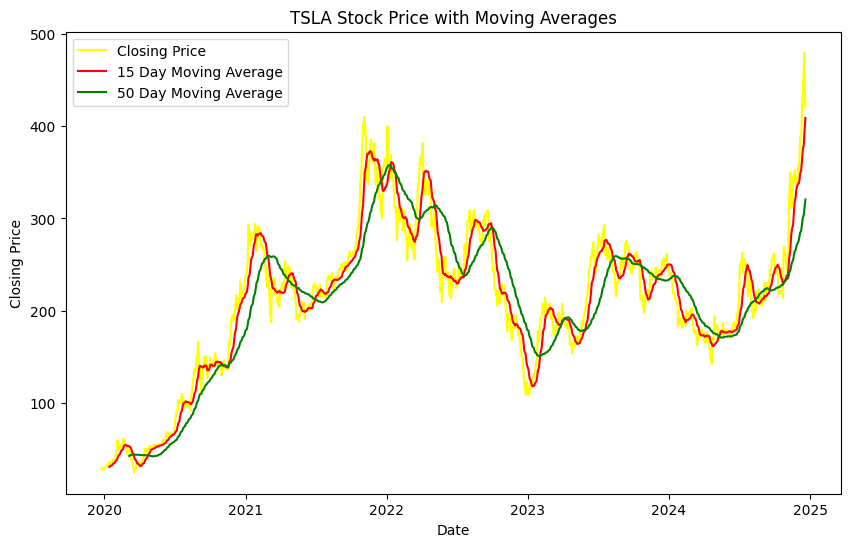

In [ ]:
# Calculating Moving Averages
data['15 Day MA'] = data['Close'].rolling(window=15).mean()
data['50 Day MA'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price', color = 'yellow')
plt.plot(data['15 Day MA'], label='15 Day Moving Average', color='red')
plt.plot(data['50 Day MA'], label='50 Day Moving Average', color='green')
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Plotting % of +ve and -ve returns for daily trades

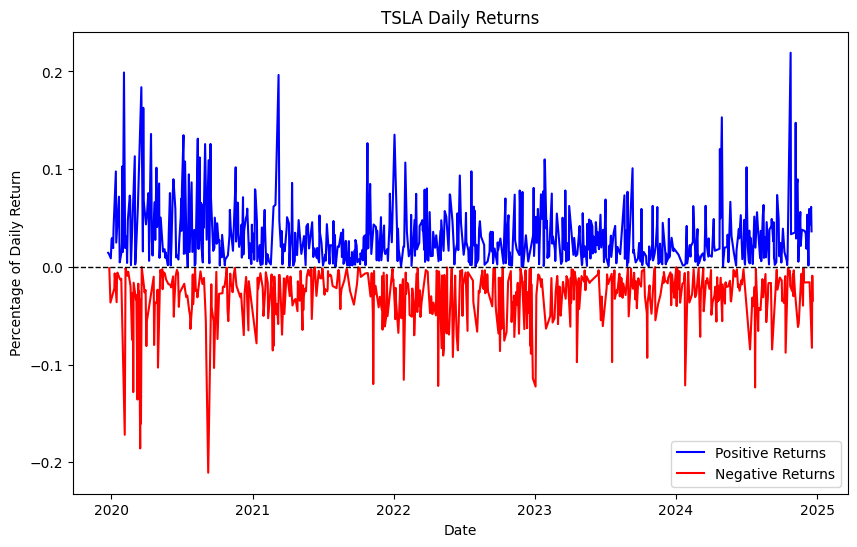

In [ ]:
# Calculate Daily Returns
data['Daily Return'] = data['Close'].pct_change()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.index[data['Daily Return'] >= 0], data['Daily Return'][data['Daily Return'] >= 0], color='blue', label='Positive Returns')
ax.plot(data.index[data['Daily Return'] < 0], data['Daily Return'][data['Daily Return'] < 0], color='red', label='Negative Returns')

# Customize the plot
plt.title('TSLA Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage of Daily Return')
plt.axhline(y=0, color='black', linewidth = 1.0, linestyle='--')
plt.legend()
plt.show()

Calculating Volatility of the stock

Volatility of TSLA:  4.2%


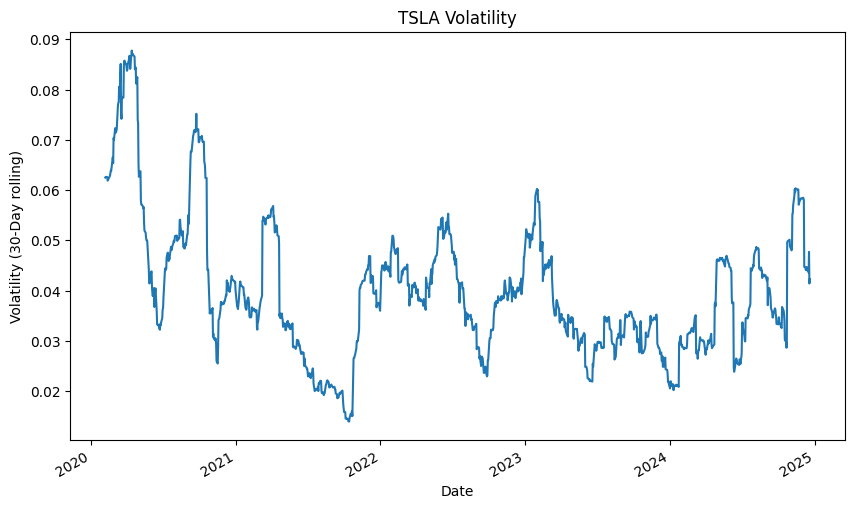

In [ ]:
volatility = data['Daily Return'].std()
print(f"Volatility of {ticker}: {volatility: .1%}")

data["rolling volatility"] = data["Daily Return"].rolling(window=30).std()
plt.figure(figsize=(10,6))
data["rolling volatility"].plot()
plt.title(f"{ticker} Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (30-Day rolling)")
plt.show()

In [ ]:
# Define risk-free rate (e.g., 1% annual rate)
risk_free_rate = 0.01 / 252  # Convert annual rate to daily rate

# Calculate Sharpe Ratio
sharpe_ratio = (data['Daily Return'].mean() - risk_free_rate) / data['Daily Return'].std()
print(f"Sharpe Ratio of {ticker}: {sharpe_ratio:.2f}")

Sharpe Ratio of TSLA: 0.07


In [ ]:
# Calculate annualized expected return and volatility
import numpy as np
daily_returns = data['Daily Return']
expected_return = daily_returns.mean() * 252  # Annualize daily return
volatility = daily_returns.std() * np.sqrt(252)  # Annualize volatility

# Create a DataFrame for summary statistics
stats = pd.DataFrame({'Expected Return': [expected_return], 'Volatility': [volatility]}, index=[ticker])
print(stats)

      Expected Return  Volatility
TSLA         0.768119    0.670528


[*********************100%***********************]  6 of 6 completed


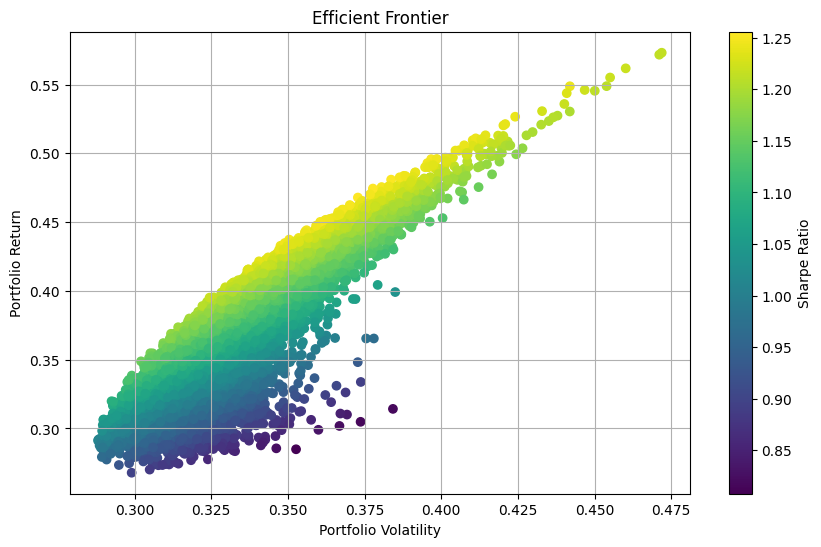

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the assets in your portfolio
assets = ["TSLA", "META", "AAPL", "AMZN", "NFLX", "GOOGL"]

# Download historical data for the assets
data = yf.download(assets, period="5y")["Adj Close"]

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate expected returns and covariance matrix
expected_returns = returns.mean() * 252  # Annualized returns
cov_matrix = returns.cov() * 252  # Annualized covariance

# Number of portfolios to simulate
num_portfolios = 10000

# Generate random portfolio weights
weights = np.random.random((num_portfolios, len(assets)))
weights /= np.sum(weights, axis=1, keepdims=True)  # Normalize weights

# Calculate portfolio returns and volatilities
portfolio_returns = np.dot(weights, expected_returns)
portfolio_volatilities = np.array([
    np.sqrt(np.dot(w.T, np.dot(cov_matrix, w))) for w in weights
])

# Calculate Sharpe ratios (assuming risk-free rate of 0)
sharpe_ratios = portfolio_returns / portfolio_volatilities

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(
    portfolio_volatilities,
    portfolio_returns,
    c=sharpe_ratios,
    cmap="viridis",
    marker="o",
)
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Return")
plt.colorbar(label="Sharpe Ratio")
plt.grid(True)
plt.title("Efficient Frontier")
plt.show()

In [ ]:
# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_ratios)

# Get the return, volatility, and Sharpe ratio for the portfolio with the maximum Sharpe ratio
max_sharpe_return = portfolio_returns[max_sharpe_idx]
max_sharpe_volatility = portfolio_volatilities[max_sharpe_idx]
max_sharpe_ratio = sharpe_ratios[max_sharpe_idx]

# Display the results
max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.4743684434906056, 0.37770129997168533, 1.255935427085284)

In [ ]:
# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_ratios)

# Get the weights for the portfolio with the maximum Sharpe ratio
max_sharpe_weights = weights[max_sharpe_idx]

# Create a DataFrame to store the weights and corresponding tickers
portfolio_weights_df = pd.DataFrame({'Ticker': assets, 'Weight': max_sharpe_weights})

# Display the portfolio weights
print(portfolio_weights_df)

  Ticker    Weight
0   TSLA  0.494108
1   META  0.000947
2   AAPL  0.074557
3   AMZN  0.035023
4   NFLX  0.031360
5  GOOGL  0.364005
